In [0]:
import numpy as np 
import random
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from copy import deepcopy 
from random import seed

In [0]:
class K_Means():
  
  """K_Means clustering object
    
    Attributes: 
    
      n_clusters: The number of clusters and centroids.
      
      self.max_iter: Maximum number of iterations of the k-means algorithm for a single run.
      
      random_state: Random number generation for centroid initialization.
      
      tol: Allowed error to declare convergence.
      
      labels: Labels of each point
      
      cluster_centers: Coordinates of cluster centers.
       
   """
  
  def __init__(self,n_clusters=2,max_iter=1000,random_state=None,tol=0.0001):
   
    """Initialize K_Means object
    
    Parameters: 
    
      n_clusters: int, optional, default: 8
      
        The number of clusters to form as well as the number of centroids to generate.
    
      max_iter:  int, default: 300
         
         Maximum number of iterations of the k-means algorithm for a single run.
    
      random_state: int or None (default)
    
        Determines random number generation for centroid initialization.
      
      tol: float, default: 1e-4
    
        Allowed error to declare convergence.
       
    """
    
    self.n_clusters= n_clusters
    self.max_iter= max_iter
    self.random_state=random_state
    self.tol=tol
    self.labels=None
    self.cluster_centers=None
  
  def fit(self,x):
    
    """Fit K_Means to x to calculate cluster centroids and cluster membership.
    
    Parameters:
     
      x: numpy array
      
        Numpy array containing data points  
    
    """
    
    random.seed(self.random_state)
    converged = False 
    
    distances = np.zeros((x.shape[0],self.n_clusters))
    centroids=x[random.sample(list(range(x.shape[0])),self.n_clusters)]
    
    i=0
    
    while i in range(self.max_iter) and converged==False:  
      
      for j in range(self.n_clusters):  
        distances[:,j] = np.sqrt(np.sum((x-centroids[j])**2,axis=1))
          
      membership= np.argmin(distances,axis=1)  
      
      previous_centroids=deepcopy(centroids)
        
      for m in range(self.n_clusters):
        centroids[m]= np.mean(np.take(x,np.where(membership==m),axis=0),axis=1)
                
      centroid_difference =np.linalg.norm(centroids - previous_centroids)
      #print(centroid_difference)
      #print(converged)
 
      if centroid_difference <= self.tol:
          converged=True
     
      i+=1
        
    self.labels= membership
    self.cluster_centers=centroids  

In [0]:
def visualize_clusters(x,kmeans):
  
  """Function to visualize clusters and respective cluster centers
  
  Parameters:
  
    x: numpy array 
    
      Numpy array containing data points
      
    kmeans: K_Means
    
      K_Means object fitted to x.
  
  """
  
  labels=kmeans.labels
  cluster_centers=kmeans.cluster_centers
  
  plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis')
  plt.scatter(cluster_centers[:,0],cluster_centers[:,1], c='black',alpha=0.5,s=100)
  plt.title('K-Means clustering')
  
  for id,centroid in enumerate(cluster_centers):
    
    plt.annotate(id,centroid,textcoords="offset pixels",xytext=(0,6),ha='center')
    
    

In [178]:
# Test code: create 100 artificial data points with 2 features and 4 centers 
x, y  = make_blobs(n_samples=100, centers=4, n_features=2,random_state=0)

print('Number of points in test data:',x.shape[0])
print('Number of clusters:',y.shape[0])
print('Expected cluster membership:')
print(y)

Number of points in test data: 100
Number of clusters: 100
Expected cluster membership:
[0 3 0 0 0 0 2 3 0 3 3 3 3 3 3 1 1 2 2 1 0 3 2 1 0 2 2 0 1 1 1 3 1 1 2 0 3
 1 3 2 0 2 3 2 2 3 1 2 0 0 0 1 2 2 2 3 3 1 1 3 3 1 1 0 1 3 2 2 1 0 3 1 0 3
 0 0 2 2 1 1 1 3 2 0 1 2 1 1 0 0 0 2 0 2 2 3 3 2 3 0]


In [179]:
# Test code: result of scikit-learn KMeans with random initilization of centroids for x
kmeans1 = KMeans(n_clusters=4, init='random',max_iter=300,random_state=0, tol=0.0001)
kmeans1.fit(x)
print('Cluster membership determined by Scikit-Learn K-Means:')
print(kmeans1.labels_)
print('Cluster centroids determined by Scikit-Learn K-Means:')
print(kmeans1.cluster_centers_)

Cluster membership determined by Scikit-Learn K-Means:
[2 3 2 2 2 2 0 3 3 3 3 3 3 3 3 1 2 2 0 1 1 3 0 1 2 0 2 2 1 1 1 3 1 1 0 2 3
 1 3 0 2 0 3 0 0 3 1 0 2 0 2 1 0 0 0 3 3 1 1 3 3 1 1 2 1 3 0 0 1 2 3 1 2 3
 2 2 2 0 1 1 1 3 0 0 1 0 1 1 2 2 2 0 0 0 0 3 3 0 3 0]
Cluster centroids determined by Scikit-Learn K-Means:
[[-1.52255073  3.2723815 ]
 [ 2.02302576  1.03388323]
 [ 1.04520307  4.3569559 ]
 [-1.26651816  7.6368152 ]]


The cluster memberships produced by  Scikit-Learn K-Means differ slightly from those generated for the artificial data. This is expected given the random initializaion of centroids, which may lead the algorithm to get stuck in a local optimum. 

In [180]:
# Test code: result of implemented K_Means with random initilization of centroids for x
kmeans2 = K_Means(n_clusters=4,max_iter=300,random_state=0, tol=0.0001)
kmeans2.fit(x)

print('Cluster membership determined by implemented K-Means:')
print(kmeans2.labels)
print('Cluster centroids determined by implemented K-Means:')
print(kmeans2.cluster_centers)

Cluster membership determined by implemented K-Means:
[3 2 3 3 3 3 1 2 2 2 2 2 2 2 2 0 3 3 1 0 0 2 1 0 3 1 3 3 0 0 0 2 0 0 1 3 2
 0 2 1 3 1 2 1 1 2 0 1 3 1 3 0 1 1 1 2 2 0 0 2 2 0 0 3 0 2 1 1 0 3 2 0 3 2
 3 3 3 1 0 0 0 2 1 1 0 1 0 0 3 3 3 1 1 1 1 2 2 1 2 1]
Cluster centroids determined by implemented K-Means:
[[ 2.02302576  1.03388323]
 [-1.52255073  3.2723815 ]
 [-1.26651816  7.6368152 ]
 [ 1.04520307  4.3569559 ]]


Cluster cluster centroids and cluster memberships produced by the K_Means implementation are the same as those produced by Scikit-Learn K-Means, but cluster ids are different.


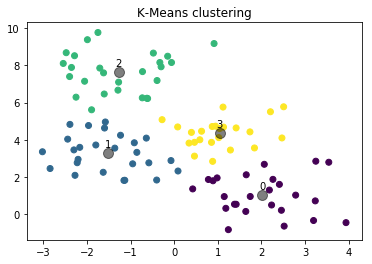

In [181]:
# Test code: visualization of the clusters for x
visualize_clusters(x,kmeans2)